<a href="https://colab.research.google.com/github/sipocz/pid_time_series/blob/main/model7/pid_autoencoder_model7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.3 MB/s 
     |████████████████████████████████| 182 kB 56.2 MB/s 
     |████████████████████████████████| 174 kB 61.9 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 173 kB 54.9 MB/s 
     |████████████████████████████████| 168 kB 47.0 MB/s 
     |████████████████████████████████| 168 kB 69.2 MB/s 
     |████████████████████████████████| 166 kB 40.4 MB/s 
     |████████████████████████████████| 166 kB 60.1 MB/s 
     |████████████████████████████████| 162 kB 65.5 MB/s 
     |████████████████████████████████| 162 kB 67.0 MB/s 
     |████████████████████████████████| 158 kB 66.4 MB/s 
     |████████████████████████████████| 157 kB 64.2 MB/s 
     |████████████████████████████████| 157 kB 61.6 MB/s 
     |████████████████████████████████| 157 kB 57.3 MB/s 
     |████████████████████████████

In [ ]:
import pandas as pd
import os
import seaborn as sns
import wandb

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#user = "Anna"
user = "SL"
uzem = "Szint1"
data_source="5"
#fname="72C03_TC_error_toNN.csv"
fname_good = "415_SC_error_part1.csv"
fname_bad = "415_SC_error_part2.csv"

In [ ]:
# Elérési út a 415_SC_error-hoz
if user=="Anna":
    path_good = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_good
    path_bad = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_bad
    path_fig = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/plots/"
else:
    path_good = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" + fname_good
    path_bad = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" + fname_bad
    path_fig = "/content/drive/MyDrive/2022Anna/Datapipeline/plots/"


In [ ]:
print(path_good)
print(path_bad)

/content/drive/MyDrive/2022Anna/Datapipeline/5/415_SC_error_part1.csv
/content/drive/MyDrive/2022Anna/Datapipeline/5/415_SC_error_part2.csv


In [ ]:
df_good = pd.read_csv(path_good,usecols=None)
df_bad = pd.read_csv(path_bad,usecols=None)

In [ ]:
print(df_good.isnull().values.any())
print(df_bad.isnull().values.any())

False
False


In [ ]:
df_good.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-54.810024,-80.342186,-60.770203,-41.081482,-21.779583,-3.82353,-0.806820,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875
1,-80.342186,-60.770203,-41.081482,-21.779583,-3.823530,-0.80682,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875


In [ ]:

import matplotlib.pyplot as plot



df_ = df_good

# You must normalize the data before applying the fit method
df_good_normalized=(df_ - df_.mean()) / df_.std()

# Normalize bad data with the good data parameters
df_bad_normalized=(df_bad - df_.mean()) / df_.std()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_all=pd.concat([df_good,df_bad],axis=0)
scaler=MinMaxScaler()
scaler.fit(df_all)
good_scaled=scaler.transform(df_good)
bad_scaled=scaler.transform(df_bad)


In [ ]:
df_good_scaled=pd.DataFrame(good_scaled,columns=df_all.columns)
df_bad_scaled=pd.DataFrame(bad_scaled,columns=df_all.columns)
df_good_scaled["state"]=0
df_bad_scaled["state"]=1

In [ ]:
df_good_scaled

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,state
0,0.203312,0.000000,0.000000,0.149256,0.339488,0.516456,0.546188,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
1,0.000000,0.155851,0.185726,0.339488,0.516456,0.546188,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
2,0.155851,0.312632,0.367803,0.516456,0.546188,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
3,0.312632,0.466332,0.537185,0.546188,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
4,0.466332,0.609315,0.565642,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0.641521,0.641521,0.575337,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
1054,0.641521,0.641521,0.575337,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
1055,0.641521,0.641521,0.575337,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
1056,0.641521,0.641521,0.575337,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0


In [ ]:
df_all_scaled=pd.concat([df_good_scaled,df_bad_scaled],axis=0)

In [ ]:
df_all_scaled.tail()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,state
1263,0.641184,0.641184,0.574937,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,...,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,1
1264,0.641184,0.641184,0.574937,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,...,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,1
1265,0.641184,0.641184,0.574937,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,...,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,1
1266,0.641184,0.641184,0.574937,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,...,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,1
1267,0.641184,0.641184,0.574937,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,...,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,1


In [ ]:
import wandb



In [ ]:
'''
7 dimenzióra képez, a grafikus megjelenítés biztató
_N1_=135
_N2_=30
_N3_=7
_lr_=0.0001
_batch_size_=32
_drop1_=0.0
_drop2_=0.0
_epochs_=3500
'''

'''
_N1_=135
_N2_=30
_N3_=2
_lr_=0.0001
_batch_size_=32
_drop1_=0.0
_drop2_=0.0
_epochs_=3500
'''
_N1_=13
_N2_=5
_N3_=3
_N4_=5
_N5_=13

_lr_=0.0001
_batch_size_=32
_drop1_=0.0
_drop2_=0.0
_epochs_=5000
_comment_="3 réteg:  20] 13 2 13 [20 "



In [ ]:
config = {"lr": _lr_, "batch_size": _batch_size_,"architecture": "AutoencoderNN", 
          "depth": 2,
          "layer1":_N1_,  "layer2":_N2_,"layer3":_N3_,"layer4":_N2_,"layer5":_N1_,"layer_out":20, 
          "drop1":_drop1_,"drop2":_drop2_,
          "epochs":_epochs_,
          "comment": _comment_

          
          
          }

wandb.init(project="pid_autoencoder", entity="pid_status",config=config)


epoch/MAE,███▇▇▆▆▅▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁████▁▁▁▁████▁▁▁▁████▁▁▁▁████▁▁▁▁
epoch/loss,███▇▇▆▆▅▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/lr,▁▁▁▁▁▁▁▁████▁▁▁▁████▁▁▁▁████▁▁▁▁████▁▁▁▁
epoch/MAE,0.01951
epoch/epoch,4999
epoch/learning_rate,0.0001
epoch/loss,0.01951
epoch/lr,0.0001


In [ ]:
from keras.engine.base_layer import regularizers
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD,Adam,Adamax,Nadam,Ftrl,Adadelta
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler

clear_session()

kernel_reg_1=tf.keras.regularizers.L2(0.1)

input_size=20


input1=Input(shape=(input_size,))

l1_out=Dense(_N1_,activation="relu",kernel_initializer='glorot_uniform',kernel_regularizer=None)(input1) # kernel_initializer='lecun_normal'  # L1

#l2_out=Dense(_N2_,activation="relu",kernel_initializer='glorot_uniform',kernel_regularizer=None)(l1_out) #kernel_initializer='lecun_normal',  # L2

l3_out=Dense(_N3_,activation="linear",kernel_initializer='glorot_uniform',name="encoded",kernel_regularizer=None)(l1_out) #kernel_initializer='lecun_normal',  # L3

#l4_out=Dense(_N4_,activation="relu",kernel_initializer='glorot_uniform',kernel_regularizer=None)(l3_out) #kernel_initializer='lecun_normal',  # L4

l5_out=Dense(_N5_,activation="relu",kernel_initializer='glorot_uniform',kernel_regularizer=None)(l3_out) #kernel_initializer='lecun_normal',  # L5




pred=Dense(input_size, activation="sigmoid",)(l5_out)

model = Model(inputs=input1, outputs=pred)
optimizer=Adamax(learning_rate=_lr_,) #

model.compile(loss='MAE',
    optimizer=optimizer,
    metrics=["MAE"])

In [ ]:
# autoencoder

In [ ]:
prediktorok=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"]
X_NN=df_all_scaled[prediktorok][:]  # 
y_NN=df_all_scaled["state"][:]

In [ ]:
model_file="model_PID__54_loss_0.116_vloss_0.115_acc_0.953_vacc_0.958.hdf5"
#model_file="model_PID__94_loss_0.116_vloss_0.115_acc_0.950_vacc_0.966.hdf5"
model_file="model_PID__4491_loss_0.115_vloss_0.679_acc_0.954_vacc_0.880.hdf5"

In [ ]:
model_url="https://github.com/sipocz/pid_time_series/raw/main/model3/"+model_file

In [ ]:
__load_file__=False

In [ ]:
if __load_file__:
    ! rm *.hdf5 
    ! wget $model_url
    model.load_weights(model_file)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_NN,y_NN,train_size=len(X_NN)-1,shuffle=True,random_state=33)

In [ ]:
len(X_NN)

2326

In [ ]:
!rm *.hdf5 

In [ ]:
def learning_rate_corrector(epoch,lr):
    
    if epoch > 4500:
        lr = 0.0001
        return lr
    
    if epoch > 4000:
        lr = 0.0005
        return lr
    

    if epoch > 3500:
        lr = 0.0001
        return lr
    
    
    if epoch > 3000:
        lr = 0.0005
        return lr
    

    if epoch > 2500:
        lr = 0.0001
        return lr
    

    if epoch > 2000:
        lr = 0.0005
        return lr
    
    if epoch > 1500:
        lr = 0.0001
        return lr
    
    if epoch > 1000:
        lr = 0.0001
        return lr
    
    if epoch > 500:
        lr = 0.0001
        return lr
    return lr
    

In [ ]:
from wandb.keras import WandbMetricsLogger
fname="./model_Encoder_"
callbacks = [
        LearningRateScheduler(learning_rate_corrector,verbose=1),
        WandbMetricsLogger(),       
        #ModelCheckpoint(filepath=fname+"_{epoch:04.0f}"+"_loss_{loss:.3f}_vloss_{val_loss:.3f}_acc_{MAE:.3f}_vacc_{val_MAE:.3f}.hdf5", 
        #                monitor='loss', verbose=2, save_best_only=True, mode='min')
        ]


In [ ]:
__learning__=True

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 13)                273       
                                                                 
 encoded (Dense)             (None, 3)                 42        
                                                                 
 dense_1 (Dense)             (None, 13)                52        
                                                                 
 dense_2 (Dense)             (None, 20)                280       
                                                                 
Total params: 647
Trainable params: 647
Non-trainable params: 0
_________________________________________________________________


In [82]:
if __learning__: 
    history = model.fit(X_train, X_train, epochs=_epochs_, batch_size=_batch_size_, verbose=1,callbacks=callbacks)


A streamkimeneten csak az utolsó 5000 sor látható.
Epoch 3751: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3751/5000
73/73 [==============================] - 0s 3ms/step - loss: 0.0182 - MAE: 0.0182 - lr: 1.0000e-04

Epoch 3752: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3752/5000
73/73 [==============================] - 0s 3ms/step - loss: 0.0182 - MAE: 0.0182 - lr: 1.0000e-04

Epoch 3753: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3753/5000
73/73 [==============================] - 0s 4ms/step - loss: 0.0182 - MAE: 0.0182 - lr: 1.0000e-04

Epoch 3754: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3754/5000
73/73 [==============================] - 0s 4ms/step - loss: 0.0182 - MAE: 0.0182 - lr: 1.0000e-04

Epoch 3755: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3755/5000
73/73 [==============================] - 0s 4ms/step - loss: 0.0182 - MAE: 0.0182 - lr: 1.0000e-04

Epoch 3756: LearningRateScheduler 

In [83]:
model.save("autoencoder_model_1_encoder.hdf5")

In [84]:
__load_file__=False
model_file="model_PID__0634_loss_0.086_vloss_1.253_acc_0.961_vacc_0.886.hdf5"
model_url="https://github.com/sipocz/pid_time_series/raw/main/model3/"+model_file

In [85]:
if __load_file__:
    ! rm *.hdf5 
    ! wget $model_url
    model.load_weights(model_file)

In [86]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 98ms/step


In [87]:
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Binarizer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [89]:
i1=model.get_layer("dense")

In [90]:
o1=model.get_layer("encoded")

In [91]:

from tensorflow.keras import backend as K

In [92]:
hidden_states_fun = K.function([i1.input],[o1.output])
     

In [93]:
def get_embedding(X):
    """Return the hidden state associated with an input at the given timestep.
    """
    
    hidden_states = hidden_states_fun(X.to_numpy())[0]
    
    return hidden_states
     

In [94]:
get_embedding(X_train)

array([[-0.9481054 , -1.5905938 ,  0.31091964],
       [-1.2358804 , -0.9072522 , -0.03366339],
       [-0.9378312 , -1.2045177 ,  0.39049748],
       ...,
       [-0.9370585 , -1.2347282 ,  0.40638748],
       [-0.9376399 , -1.2356225 ,  0.40635604],
       [-0.94250816, -1.232071  ,  0.40693992]], dtype=float32)

In [95]:
hs=hidden_states_fun(X_train.to_numpy())[0]

In [96]:
len(hs)

2325

In [97]:
hs[3].tolist()

[-0.9365935921669006, -1.234012484550476, 0.4064127802848816]

In [98]:
X_train.iloc[1:2,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
197,0.745236,0.736633,0.669679,0.675073,0.666591,0.65811,0.68836,0.659147,0.647462,0.596853,0.613648,0.635157,0.586837,0.428412,0.429968,0.350293,0.655865,0.55388,0.427329,0.359316


In [99]:
embedding_list=get_embedding(X_train)

In [100]:
len(embedding_list)

2325

In [101]:
def color_changer(arr):
    o=["r" if i>0.5 else "g" for i in arr]
    return o

In [102]:
embedding_list[:][0]

array([-0.9481054 , -1.5905938 ,  0.31091964], dtype=float32)

In [103]:
embedding_list[:][-100]

array([-1.1166334, -1.2858471,  0.3805421], dtype=float32)

In [104]:
def plot_embedding(list_in, predicted, index2=1):
    xkoordinata=[i[0] for i in list_in]
    ykoordinata=[i[index2] for i in list_in]
    
    plot.figure(figsize=(12,6))
    col_ch=color_changer(predicted)
    plot.scatter(xkoordinata,ykoordinata,c=col_ch,marker=".",alpha=0.3)
    plot.ylabel('értékek')
    plot.xlabel('index')
    plot
    plot.show()

In [138]:
def plot_embedding_3d(list_in, predicted):
    import plotly.express as px
    xkoordinata=[i[0] for i in list_in]
    ykoordinata=[i[1] for i in list_in]
    zkoordinata=[i[2] for i in list_in]
    zipped=list(zip(xkoordinata,ykoordinata,zkoordinata))
    df_tmp=pd.DataFrame(zipped,columns=["x","y","z"])
    df_tmp["pred"]=predicted.tolist()
    fig = px.scatter_3d(df_tmp, x='x', y='y', z='z', color='pred', width=1200, height=1000)
    
    fig.show()




In [ ]:
y_train.tolist()

In [139]:
plot_embedding_3d(embedding_list[:],y_train[:])

In [105]:
embedding_list[0:]

array([[-0.9481054 , -1.5905938 ,  0.31091964],
       [-1.2358804 , -0.9072522 , -0.03366339],
       [-0.9378312 , -1.2045177 ,  0.39049748],
       ...,
       [-0.9370585 , -1.2347282 ,  0.40638748],
       [-0.9376399 , -1.2356225 ,  0.40635604],
       [-0.94250816, -1.232071  ,  0.40693992]], dtype=float32)

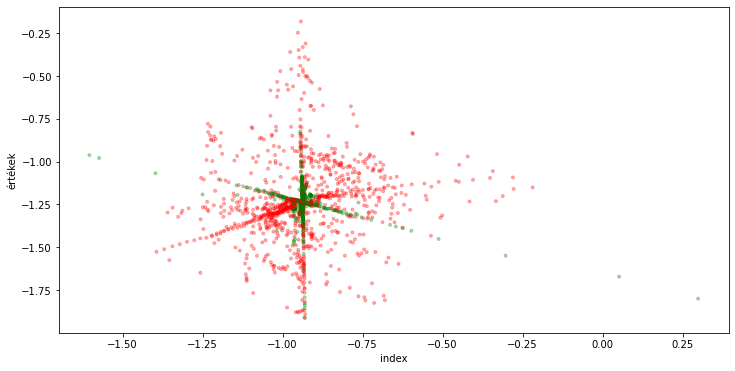

In [106]:
plot_embedding(embedding_list[:],y_train[:],index2=1)

TypeError: ignored

In [107]:
def grafikon3(fx,desc1,txt1,desc2="",txt2="",desc3="",txt3="",ngraf=2,c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)',c3='rgba(193,99,99,0.8)',title=None):
    '''
    fx: dataFrame
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title
    '''
    
    #x_=[i for i in range(len(y_pred))]
    if title==None:
      title=txt1+" "+txt2
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(specs=[[{"secondary_y": True}]])


    if ngraf>=3:
        fig0.add_trace(
            go.Bar(x=fx.index, y=fx[desc3], marker_color='rgba(225, 20, 20,0.2)',  name=txt3, showlegend=True, ),
              secondary_y=False,
            #row=1, col=1
        )


    if ngraf>=2:
        fig0.add_trace(
            go.Scatter(x=fx.index, y=fx[desc2], name=txt2, line=dict(color=c2) ,showlegend=True  ),
            secondary_y=False,
            #row=1, col=1

        )

    fig0.add_trace(
        go.Scatter(x=fx.index, y=fx[desc1], name=txt1, line=dict(color=c1) ,showlegend=True  ),
        secondary_y=False,
        #row=1, col=1

    )

    fig0.update_layout(
        title=title,
        autosize=False,
        width=1200,
        height=600,
        
        )

    print(title)
    fig0.update_yaxes(title_text="<b>"+title+"</b>", secondary_y=False)
    #fig0.update_yaxes(title_text="<b>Alarm státusz</b>", secondary_y=True)
    fig0.update_layout(paper_bgcolor='rgb(200,200,200)')
    fig0.show()

In [108]:

history_df=pd.DataFrame({"epoch":history.epoch, "loss":history.history["loss"],"val_loss":history.history["val_loss"]})

KeyError: ignored

In [ ]:
grafikon3(history_df,"loss","Loss","val_loss","Val_Loss",title=None)